#Data Analysis on Stroke Dataset

    Introduction

   A stroke occurs when a blood vessel in the brain ruptures and bleeds, or when there’s a blockage in the blood supply to the brain. The rupture or blockage prevents blood and oxygen from reaching the brain’s tissues.

    This dataset consist of :
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not


    Contents : 
- Data Preparation
  - Importing Library
  - Reading csv dataset
  - Check dataset type
  - Check dataset info
  - Check dataset summary

- Data Cleaning
  - Checking null values
  - Handling null values
  - Checking duplicates

- Data Visualization
  - Countplot
  - Heatmap
  - Scatter plot
  - Distplot
  - Box plot

## Data Preparation

### Importing Library

In [3]:
#import lib
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#hide warnings
import warnings
warnings.filterwarnings ("ignore")

### Reading CSV Dataset

In [4]:
#reading csv dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#dataset type
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#dataset describe
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Checking null values

In [8]:
#checking null values
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**There is 1 null values in this dataset**

### Handling null values

In [9]:
#replacing null values using fillna method
data['bmi'] = data['bmi'].fillna(method = 'ffill')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,22.8,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [10]:
data['bmi'].isna().sum()

0

***There is no more null values in bmi category***

### Checking duplicates

In [11]:
data.duplicated().sum()

0

**There is no duplicates**

## Data Visualization

### Countplot

Text(0, 0.5, 'Count of Patient')

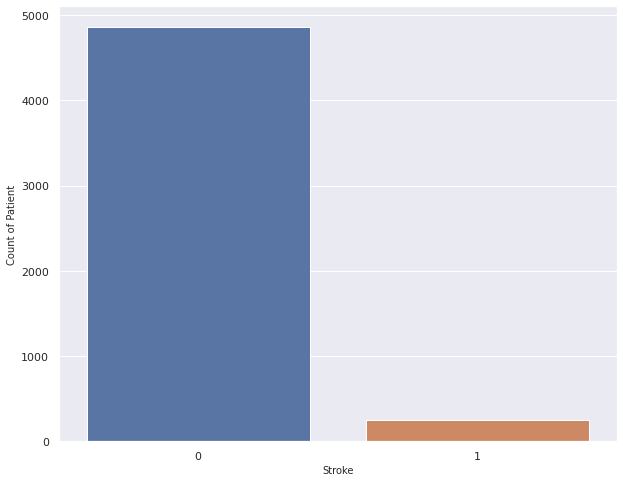

In [12]:
#set figure size
sns.set(rc={'figure.figsize':(10,8)})

#countplot
seaborn_plot = sns.countplot(data['stroke'])

#set x and y label
seaborn_plot.set_xlabel('Stroke',fontsize=10)
seaborn_plot.set_ylabel('Count of Patient',fontsize=10)

      countplot for patients

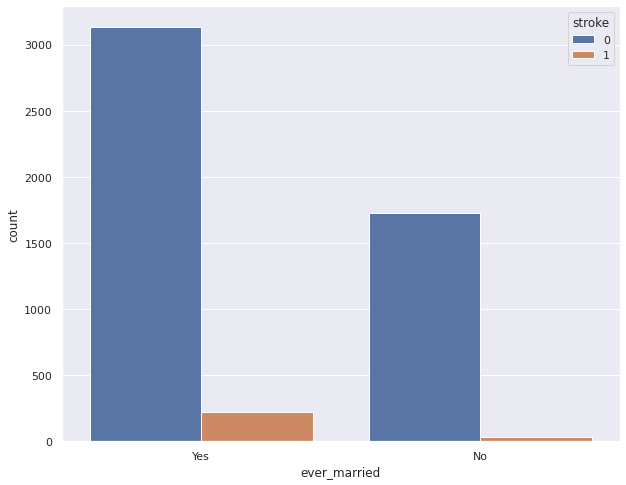

In [13]:
#set figure size
sns.set(rc={'figure.figsize':(10,8)})

#countplot
sns.countplot(data['ever_married'], hue= data['stroke'])

      Count of patients based on their marital status.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


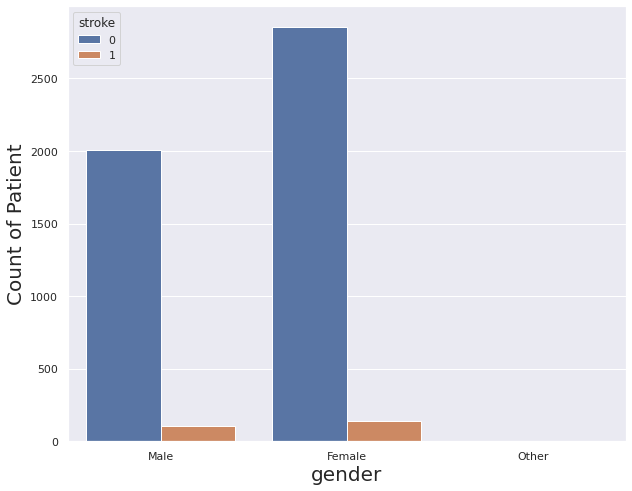

In [14]:
#set figure size
sns.set(rc={'figure.figsize':(10,8)})

#countplot
seaborn_plot = sns.countplot(data['gender'], hue = data['stroke'])

#set x and y label
seaborn_plot.set_xlabel("gender",fontsize=20)
seaborn_plot.set_ylabel("Count of Patient",fontsize=20)

#total values
print(data['gender'].value_counts())

      Count of patients based on their gender.

0    4834
1     276
Name: heart_disease, dtype: int64


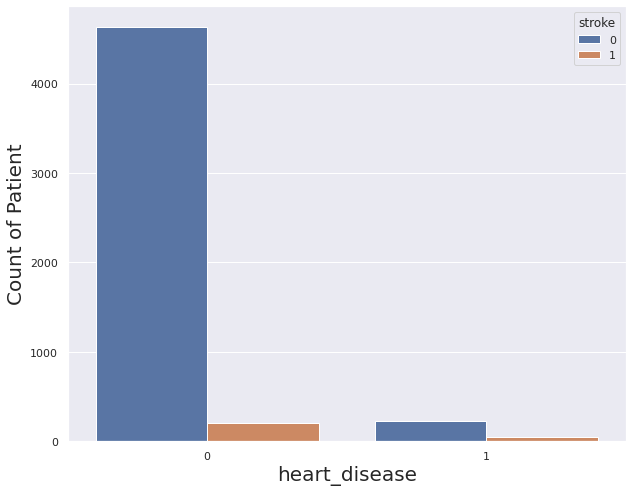

In [15]:
#set figure size
sns.set(rc={'figure.figsize':(10,8)})

#countplot
seaborn_plot = sns.countplot(data['heart_disease'], hue = data['stroke'])

#set x and y label
seaborn_plot.set_xlabel("heart_disease",fontsize=20)
seaborn_plot.set_ylabel("Count of Patient",fontsize=20)

#total values
print(data['heart_disease'].value_counts())

      Count of patients based on suffer form heart_disease.

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


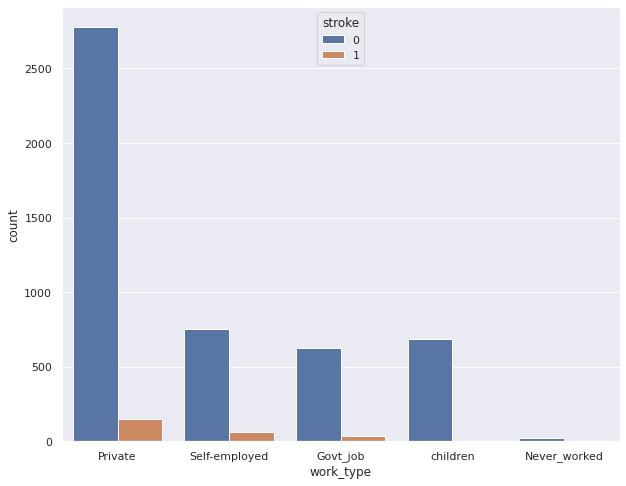

In [16]:
#set figure size
sns.set(rc={'figure.figsize':(10,8)})

#countplot
sns.countplot(data['work_type'], hue = data['stroke'])

#total values
print(data['work_type'].value_counts())

      Count of patients based on their profession.

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


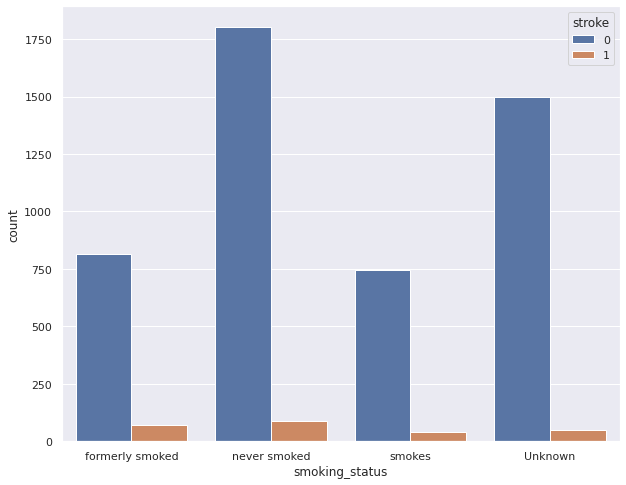

In [17]:
#set figure size
sns.set(rc={'figure.figsize':(10,8)})

#countplot
sns.countplot(data['smoking_status'], hue = data['stroke'])

#total values
print(data['smoking_status'].value_counts())

      Count of patients based on their smoking habits.

0    4612
1     498
Name: hypertension, dtype: int64


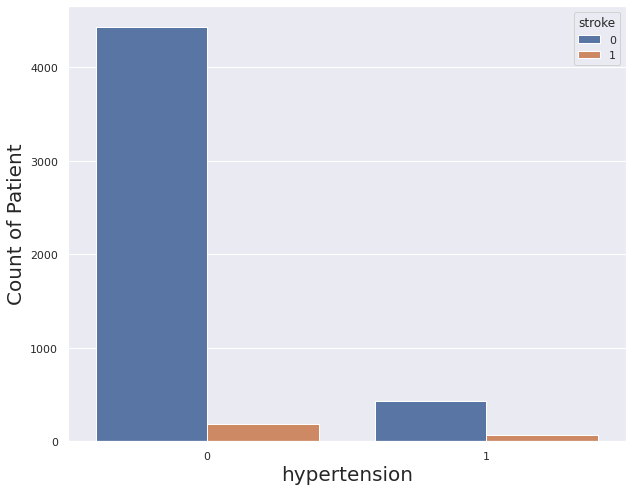

In [18]:
#set figure sizw
sns.set(rc={'figure.figsize':(10,8)})

#countplot
seaborn_plot = sns.countplot(data['hypertension'], hue = data['stroke'])

#set x and y label
seaborn_plot.set_xlabel("hypertension",fontsize=20)
seaborn_plot.set_ylabel("Count of Patient",fontsize=20)

#total values
print(data['hypertension'].value_counts())

      Count of patients based on whether they have hypertension.

### Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

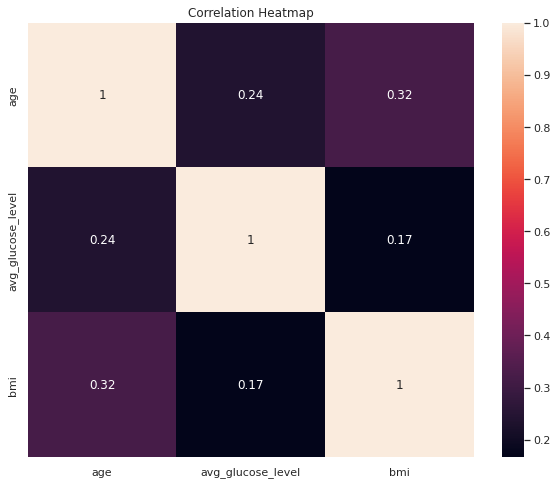

In [19]:
#set figure size
fig, ax = plt.subplots(figsize=(10,8))

#heatmap
heatmap = sns.heatmap(data[['age', 'avg_glucose_level', 'bmi']].corr(), vmax=1, annot=True,ax = ax)

#set heatmap title
heatmap.set_title('Correlation Heatmap')

      Heatmap numerical variables present in the dataset.

### Scatter Plot

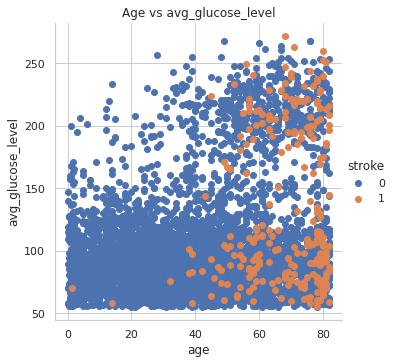

In [20]:
#set scatter plot style
sns.set_style("whitegrid")

#scatter plot
sns.FacetGrid(data, hue="stroke", height=5).map(plt.scatter, "age", "avg_glucose_level").add_legend()

#set scatter plot title
plt.title('Age vs avg_glucose_level')

#print result
plt.show()

      Scatterplot of Age and avg_glucose_level

### Distplot

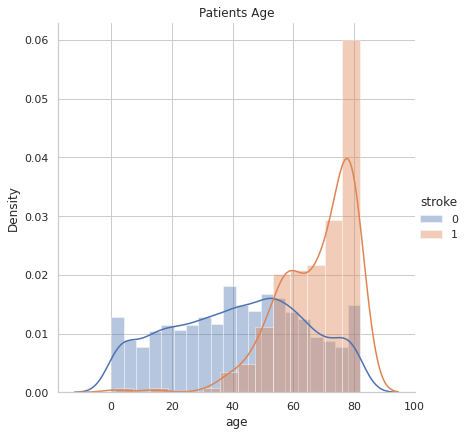

In [21]:
#distplot and set distplot height size
sns.FacetGrid(data, hue="stroke", height = 6).map(sns.distplot, "age").add_legend()

#set distplot title
plt.title("Patients Age")

#print result
plt.show()

      Age Distplot.

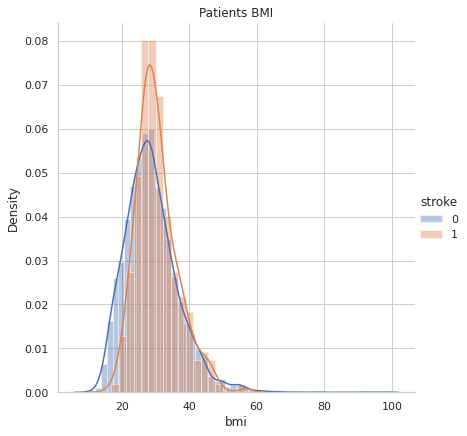

In [22]:
#distplot, and set distplot height size
sns.FacetGrid(data, hue="stroke", height = 6).map(sns.distplot, "bmi").add_legend()

#set distplot title
plt.title("Patients BMI")

#print result
plt.show()

     Patients BMI Distplot.

### Box Plot

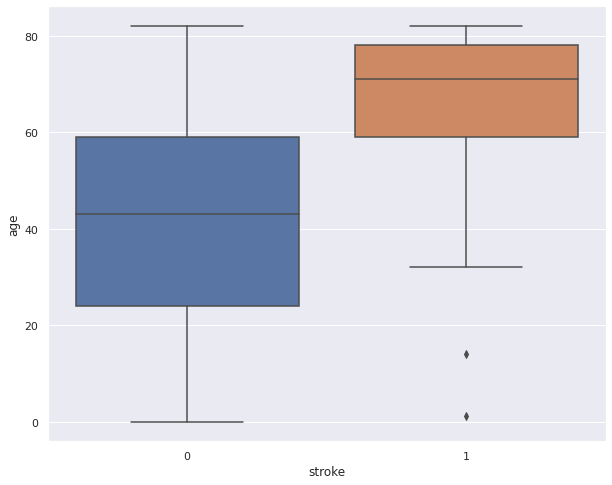

In [23]:
#set figure size
sns.set(rc={'figure.figsize':(10,8)})

#box plot
sns.boxplot(x='stroke',y='age', data=data)

#set box plot x and y label
seaborn_plot.set_xlabel("stroke",fontsize=20)
seaborn_plot.set_ylabel("age",fontsize=20)

#print result
plt.show()

      Box Plot for Stroke and Age.